In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [3]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [4]:
#데이터 위치
# https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml

In [5]:
#참고 사이트 : https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/

In [8]:
# 빈곤율
poverty_level = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")

In [9]:
poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [10]:
poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [11]:
poverty_level.corr()# 값이 1개 밖에 없어서 산관관계분석안됨
#참고 : https://gomguard.tistory.com/173

""


In [12]:
poverty_level.all # 데이터 상태 확인 ' -' 발견

<bound method DataFrame.all of       Geographic Area                    City poverty_rate
0                  AL              Abanda CDP         78.8
1                  AL          Abbeville city         29.1
2                  AL         Adamsville city         25.5
3                  AL            Addison town         30.7
4                  AL              Akron town           42
5                  AL          Alabaster city         11.2
6                  AL        Albertville city         26.7
7                  AL     Alexander City city         30.4
8                  AL          Alexandria CDP          9.7
9                  AL         Aliceville city         41.3
10                 AL            Allgood town         27.7
11                 AL            Altoona town         27.5
12                 AL          Andalusia city         24.5
13                 AL           Anderson town         13.8
14                 AL           Anniston city         31.7
15                 AL    

In [13]:
poverty_level.poverty_rate.replace(['-'],0.0, inplace = True ) #0.0으로 변경

In [14]:
poverty_level.poverty_rate.dtype # object 값임

dtype('O')

In [15]:
poverty_level.poverty_rate #int와 float가 섞여있음

0        78.8
1        29.1
2        25.5
3        30.7
4          42
5        11.2
6        26.7
7        30.4
8         9.7
9        41.3
10       27.7
11       27.5
12       24.5
13       13.8
14       31.7
15       16.7
16       19.1
17        8.6
18       37.6
19       31.6
20       18.8
21       22.4
22       28.3
23         13
24       24.7
25       20.3
26       31.8
27       24.1
28       22.2
29        6.8
         ... 
29299       0
29300     4.8
29301     9.4
29302     4.7
29303    14.3
29304       0
29305       0
29306    14.8
29307       0
29308    14.1
29309    13.4
29310    20.9
29311       0
29312    15.5
29313     2.2
29314    42.9
29315       0
29316     3.3
29317     6.4
29318     2.2
29319       0
29320     100
29321      12
29322       0
29323     2.9
29324    18.6
29325    15.3
29326     5.9
29327     5.4
29328       0
Name: poverty_rate, Length: 29329, dtype: object

In [16]:
poverty_level.poverty_rate = poverty_level.poverty_rate.astype(float) # float변경

In [17]:
poverty_level.poverty_rate.dtype

dtype('float64')

In [18]:
area_list = list(poverty_level['Geographic Area'].unique())
area_list

['AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'DC',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

In [19]:
#각주마다 평균값을 내야 하므로 x에 각주마다 모든 값을 더한후 숫자만큼나누어  area_poverty_rate에 저장 한후
#area_poverty_ratio에 저장
area_poverty_ratio = []
for i in area_list:
    x = poverty_level[poverty_level['Geographic Area']==i]
    print(x)
    area_poverty_rate = sum(x.poverty_rate)/len(x) 
    print(area_poverty_rate)
    area_poverty_ratio.append(area_poverty_rate)

    Geographic Area                    City  poverty_rate
0                AL              Abanda CDP          78.8
1                AL          Abbeville city          29.1
2                AL         Adamsville city          25.5
3                AL            Addison town          30.7
4                AL              Akron town          42.0
5                AL          Alabaster city          11.2
6                AL        Albertville city          26.7
7                AL     Alexander City city          30.4
8                AL          Alexandria CDP           9.7
9                AL         Aliceville city          41.3
10               AL            Allgood town          27.7
11               AL            Altoona town          27.5
12               AL          Andalusia city          24.5
13               AL           Anderson town          13.8
14               AL           Anniston city          31.7
15               AL               Arab city          16.7
16            

      Geographic Area               City  poverty_rate
18779              ND   Abercrombie city          20.3
18780              ND         Adams city          22.7
18781              ND         Alamo city           1.4
18782              ND     Alexander city           1.3
18783              ND         Alice city           3.0
18784              ND        Almont city           3.1
18785              ND         Alsen city           0.0
18786              ND       Ambrose city           0.0
18787              ND        Amenia city           2.4
18788              ND        Amidon city           6.3
18789              ND      Anamoose city           4.5
18790              ND         Aneta city          13.3
18791              ND        Antler city          20.0
18792              ND        Ardoch city           2.0
18793              ND    Argusville city           1.1
18794              ND      Arnegard city          26.1
18795              ND        Arthur city           4.7
18796     

In [20]:
#각주마다 area_poverty_ratio를 딕셔너리 형으로 저장
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
print(data)

   area_list  area_poverty_ratio
0         AL           20.611795
1         AK           18.678592
2         AZ           25.268071
3         AR           22.963216
4         CA           16.888371
5         CO           13.187773
6         CT            9.137500
7         DE           12.555844
8         DC           18.000000
9         FL           17.508606
10        GA           23.663636
11        HI           13.400662
12        ID           18.076211
13        IL           13.849342
14        IN           15.499853
15        IA           12.231548
16        KS           14.719048
17        KY           20.080000
18        LA           22.291772
19        ME           16.893846
20        MD           10.272394
21        MA            9.546341
22        MI           17.900723
23        MN           13.745736
24        MS           26.884254
25        MO           19.930687
26        MT           16.423288
27        NE           12.917414
28        NV           12.370992
29        

In [21]:
# area_poverty_ratio를 내림차순으로 정렬
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

Text(0.5, 1.0, '미국의 각주마다 빈곤율')

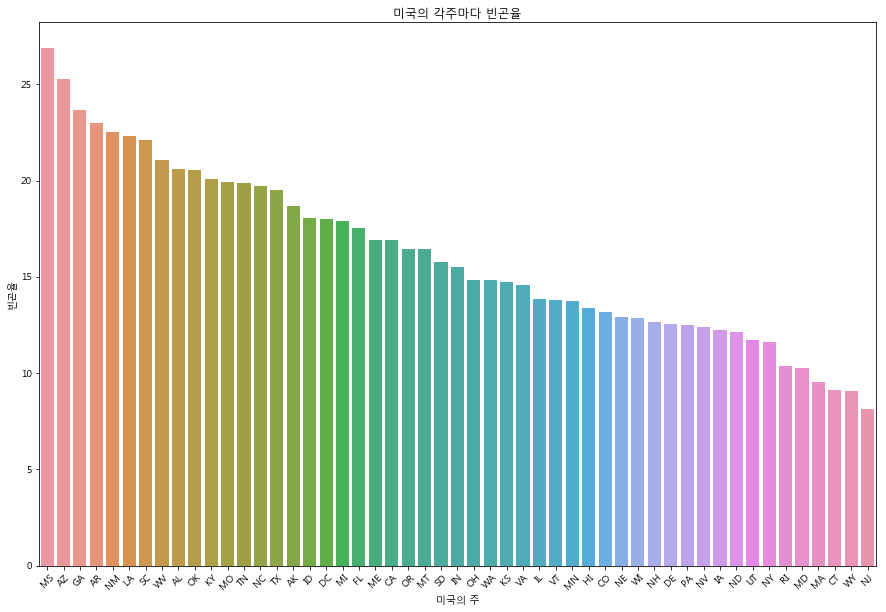

In [22]:
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 45) 
#참조 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xlabel('미국의 주')
plt.ylabel('빈곤율')
plt.title('미국의 각주마다 빈곤율')

In [25]:
# 경찰에의해서 죽은사람
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [26]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [27]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
id                         2535 non-null int64
name                       2535 non-null object
date                       2535 non-null object
manner_of_death            2535 non-null object
armed                      2526 non-null object
age                        2458 non-null float64
gender                     2535 non-null object
race                       2340 non-null object
city                       2535 non-null object
state                      2535 non-null object
signs_of_mental_illness    2535 non-null bool
threat_level               2535 non-null object
flee                       2470 non-null object
body_camera                2535 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 242.7+ KB


In [28]:
kill.corr()
#참고 : https://gomguard.tistory.com/173

,id,age,signs_of_mental_illness,body_camera
id,1.000000,0.001939,-0.043706,0.038786
age,0.001939,1.000000,0.117285,-0.027392
signs_of_mental_illness,-0.043706,0.117285,1.000000,0.015721
body_camera,0.038786,-0.027392,0.015721,1.000000


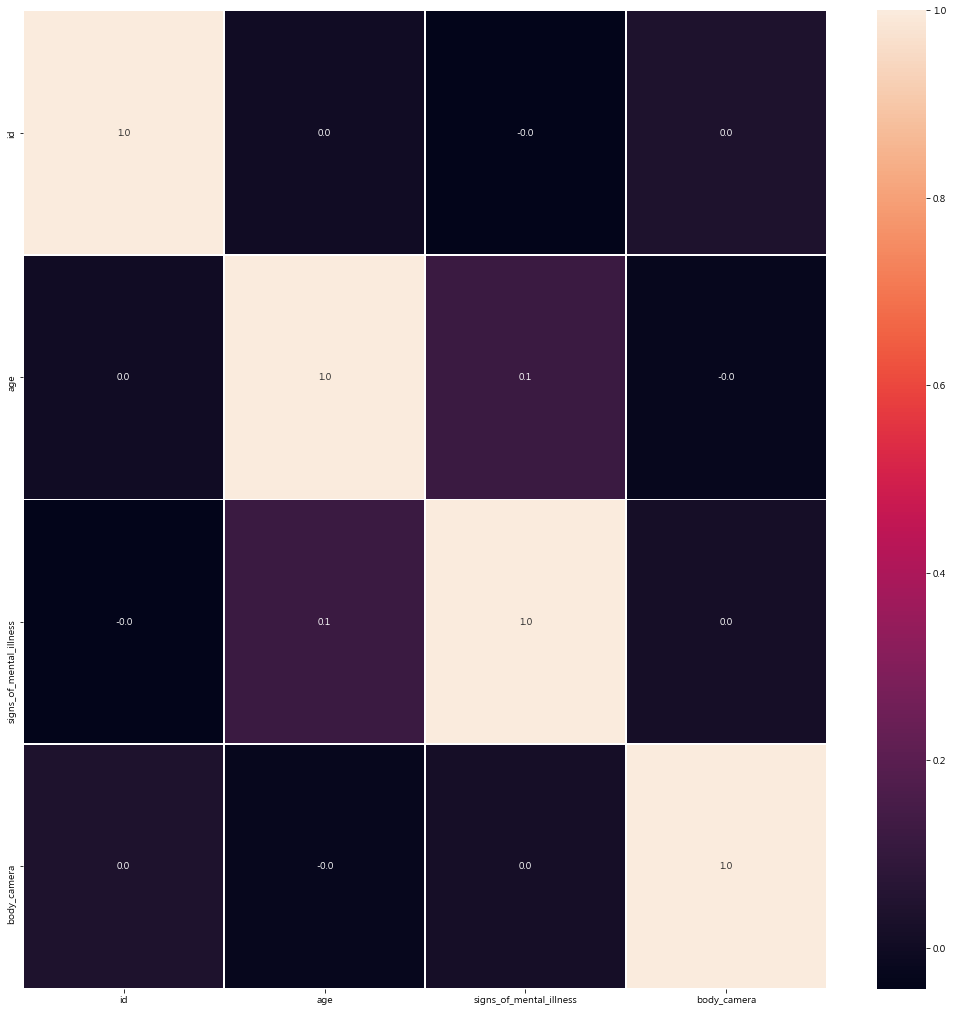

In [29]:
# 상관 관계지도
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(kill.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [30]:
kill.name.value_counts() #동명이인이 몇명있는지 검색

TK TK                       49
Eric Harris                  2
Michael Johnson              2
Michael Brown                2
Daquan Antonio Westbrook     2
Brandon Jones                2
TK Tk                        2
Charles Johnston             1
Jose Perez                   1
John Martin Whittaker        1
Leeland White                1
Tiano Meton                  1
Andrew Jospeh Todd           1
Marese V. Collins            1
Tyrie Cuyler                 1
John Alan Britton            1
Matthew Castillo             1
Corey DiGiovanni             1
Nicolas Sanchez              1
Peter J. Doffin              1
Reginald Darnell Dogan       1
Jeffrey Clyde Wilkes         1
Grover Sapp                  1
William Verrett              1
William D. Spates            1
James Edward Ray             1
Lucien Rolland               1
Talbot Schroeder             1
Dylan Pape                   1
Scott Scanlon                1
                            ..
John Dieringer               1
Robert B

In [31]:
["herbert", "darien"] # 두명의 이름이 있는지 검색

['herbert', 'darien']

In [32]:
separate = kill.name[kill.name != 'TK TK'].str.split()  # 'TK TK'제외하고 모든이름출력
separate #이름을 보니 성, 이름, 추가이름 이 있음 

0                               [Tim, Elliot]
1                        [Lewis, Lee, Lembke]
2                      [John, Paul, Quintero]
3                          [Matthew, Hoffman]
4                        [Michael, Rodriguez]
5                       [Kenneth, Joe, Brown]
6                     [Kenneth, Arnold, Buck]
7                            [Brock, Nichols]
8                            [Autumn, Steele]
9                         [Leslie, Sapp, III]
10                          [Patrick, Wetter]
11                               [Ron, Sneed]
12        [Hashim, Hanif, Ibn, Abdul-Rasheed]
13                 [Nicholas, Ryan, Brickman]
14      [Omarr, Julian, Maximillian, Jackson]
15                           [Loren, Simpson]
16                    [James, Dudley, Barker]
17                    [Artago, Damon, Howard]
18                            [Thomas, Hamby]
19                           [Jimmy, Foreman]
20                           [Andy, Martinez]
21                             [To

In [33]:
# a,b,c = zip(*separate)
a,b = zip(*separate) #공통적으로 2개 이름이 표준이기때문에 2개만됨

In [34]:
a

('Tim',
 'Lewis',
 'John',
 'Matthew',
 'Michael',
 'Kenneth',
 'Kenneth',
 'Brock',
 'Autumn',
 'Leslie',
 'Patrick',
 'Ron',
 'Hashim',
 'Nicholas',
 'Omarr',
 'Loren',
 'James',
 'Artago',
 'Thomas',
 'Jimmy',
 'Andy',
 'Tommy',
 'Brian',
 'Salvador',
 'John',
 'Richard',
 'Marcus',
 'Michael',
 'Mario',
 'Talbot',
 'Robert',
 'Jeffrey',
 'Donte',
 'Kavonda',
 'Quincy',
 'Jose',
 'Nathan',
 'Scott',
 'Zaki',
 'Terence',
 'Pablo',
 'Daniel',
 'Jonathan',
 'Carter',
 'Paul',
 'Dewayne',
 'Todd',
 'Miguel',
 'Isaac',
 'Andrew',
 'Tiano',
 'Kristiana',
 'Robert',
 'Demaris',
 'Jose',
 'Wendell',
 'Daryl',
 'Darin',
 'Orlando',
 'William',
 'Jessie',
 'Raymond',
 'Joshua',
 'David',
 'Nicolas',
 'Chris',
 'Jermonte',
 'Tiffany',
 'Alan',
 'Matautu',
 'Cody',
 'Ralph',
 'Alan',
 'John',
 'Victor',
 'Edward',
 'Jacob',
 'David',
 'Francis',
 'Ledarius',
 'Yuvette',
 'Dewayne',
 'Anthony',
 'Jeremy',
 'Izzy',
 'Salvador',
 'Joaquin',
 'Jimmy',
 'Markell',
 'Paul',
 'Herbert',
 'John',
 'Jam

In [35]:
b

('Elliot',
 'Lee',
 'Paul',
 'Hoffman',
 'Rodriguez',
 'Joe',
 'Arnold',
 'Nichols',
 'Steele',
 'Sapp',
 'Wetter',
 'Sneed',
 'Hanif',
 'Ryan',
 'Julian',
 'Simpson',
 'Dudley',
 'Damon',
 'Hamby',
 'Foreman',
 'Martinez',
 'Smith',
 'Barbosa',
 'Figueroa',
 'Edward',
 'McClendon',
 'Golden',
 'Goebel',
 'Jordan',
 'Schroeder',
 'Edwards',
 'R.',
 'Sowell',
 'Earl',
 'Reed',
 'Ceja',
 'Massey',
 'Hall',
 'Shinwary',
 'Walker',
 'Meza',
 'Brumley',
 'Guillory',
 'Castle',
 'Campbell',
 'Carr',
 'Allen',
 'Angel',
 'Holmes',
 'Toto',
 'Meton',
 'Coignard',
 'Francis',
 'Turner',
 'Antonio',
 'King',
 'Myler',
 'Hutchins',
 'Jude',
 'Campbell',
 'Hernandez',
 'Kmetz',
 'Omar',
 'Garcia',
 'Leland',
 'Ingram',
 'Fletcher',
 'Terry',
 'Lance',
 'Nuu',
 'Karasek',
 'Willis',
 'James',
 'Barry',
 'Manuel',
 'Donnell',
 'Haglund',
 'Kassick',
 'Murphy',
 'D.',
 'Henderson',
 'Deshawn',
 'Purvis',
 'Lett',
 'Colon',
 'Muna',
 'Hernandez',
 'Ray',
 'Atkins',
 'Alfred',
 'Hill',
 'Sawyer',
 'All

In [36]:
name_list = a+b

In [37]:
name_list # 외국에는 성으로 불리우는 경우와 이름으로 불리우는 경우가 있어서....

('Tim',
 'Lewis',
 'John',
 'Matthew',
 'Michael',
 'Kenneth',
 'Kenneth',
 'Brock',
 'Autumn',
 'Leslie',
 'Patrick',
 'Ron',
 'Hashim',
 'Nicholas',
 'Omarr',
 'Loren',
 'James',
 'Artago',
 'Thomas',
 'Jimmy',
 'Andy',
 'Tommy',
 'Brian',
 'Salvador',
 'John',
 'Richard',
 'Marcus',
 'Michael',
 'Mario',
 'Talbot',
 'Robert',
 'Jeffrey',
 'Donte',
 'Kavonda',
 'Quincy',
 'Jose',
 'Nathan',
 'Scott',
 'Zaki',
 'Terence',
 'Pablo',
 'Daniel',
 'Jonathan',
 'Carter',
 'Paul',
 'Dewayne',
 'Todd',
 'Miguel',
 'Isaac',
 'Andrew',
 'Tiano',
 'Kristiana',
 'Robert',
 'Demaris',
 'Jose',
 'Wendell',
 'Daryl',
 'Darin',
 'Orlando',
 'William',
 'Jessie',
 'Raymond',
 'Joshua',
 'David',
 'Nicolas',
 'Chris',
 'Jermonte',
 'Tiffany',
 'Alan',
 'Matautu',
 'Cody',
 'Ralph',
 'Alan',
 'John',
 'Victor',
 'Edward',
 'Jacob',
 'David',
 'Francis',
 'Ledarius',
 'Yuvette',
 'Dewayne',
 'Anthony',
 'Jeremy',
 'Izzy',
 'Salvador',
 'Joaquin',
 'Jimmy',
 'Markell',
 'Paul',
 'Herbert',
 'John',
 'Jam

In [38]:
a=[1,2,3,4]
b=[5,6,7,8,9]
c= a+b
c

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [39]:
name_count = Counter(name_list)
name_count # 동일이름 카운터하기

Counter({'Tim': 3,
         'Lewis': 5,
         'John': 42,
         'Matthew': 24,
         'Michael': 91,
         'Kenneth': 19,
         'Brock': 1,
         'Autumn': 1,
         'Leslie': 3,
         'Patrick': 13,
         'Ron': 2,
         'Hashim': 1,
         'Nicholas': 13,
         'Omarr': 1,
         'Loren': 3,
         'James': 56,
         'Artago': 1,
         'Thomas': 26,
         'Jimmy': 5,
         'Andy': 1,
         'Tommy': 3,
         'Brian': 12,
         'Salvador': 4,
         'Richard': 36,
         'Marcus': 5,
         'Mario': 8,
         'Talbot': 1,
         'Robert': 48,
         'Jeffrey': 18,
         'Donte': 3,
         'Kavonda': 1,
         'Quincy': 2,
         'Jose': 28,
         'Nathan': 6,
         'Scott': 23,
         'Zaki': 1,
         'Terence': 3,
         'Pablo': 3,
         'Daniel': 46,
         'Jonathan': 13,
         'Carter': 2,
         'Paul': 19,
         'Dewayne': 3,
         'Todd': 9,
         'Miguel': 10,
       

In [40]:
most_common_names = name_count.most_common(15) #most_common은 docstring 참조 상위 15개 만 보여줌
most_common_names

[('Michael', 91),
 ('David', 57),
 ('James', 56),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 37),
 ('Richard', 36),
 ('J.', 32),
 ('Anthony', 31),
 ('Jose', 28),
 ('Joshua', 28)]

In [41]:
x,y = zip(*most_common_names)
x

('Michael',
 'David',
 'James',
 'Robert',
 'Joseph',
 'William',
 'Daniel',
 'John',
 'Christopher',
 'Lee',
 'Richard',
 'J.',
 'Anthony',
 'Jose',
 'Joshua')

In [42]:
y

(91, 57, 56, 48, 48, 47, 46, 42, 40, 37, 36, 32, 31, 28, 28)

In [43]:
x,y = list(x),list(y)

Text(0.5, 1.0, '미국에서 주로 살해당하는 15개의 이름')

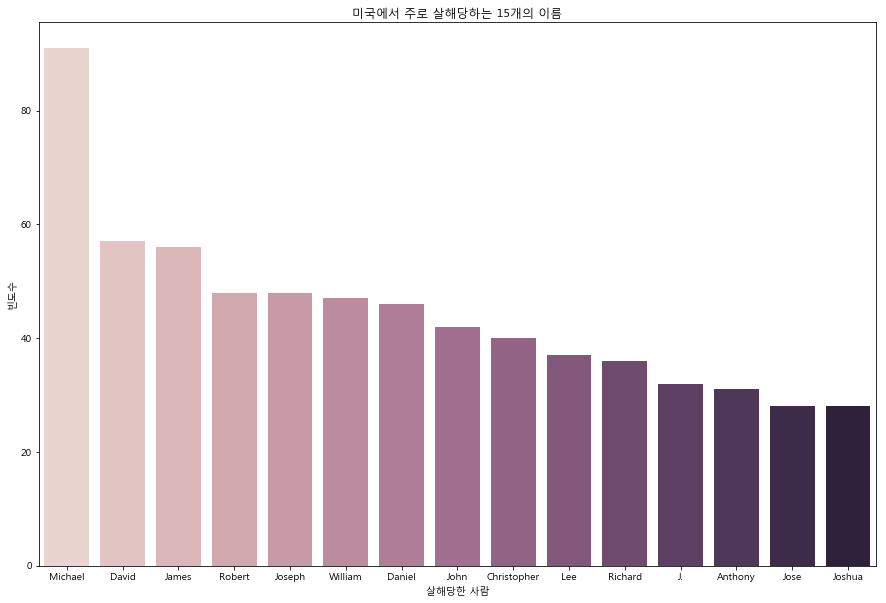

In [44]:
# visualization
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
#위의 차트와 달리 파일을 합치지 않고 x 와 y를 분리하여 저장하고 그래프에 보여줌
plt.xlabel('살해당한 사람')
plt.ylabel('빈도수')
plt.title('미국에서 주로 살해당하는 15개의 이름')

In [47]:
# 고등학교 졸업률
highSchool = pd.read_csv('PercentOver25CompletedHighSchool.csv', encoding="windows-1252")

In [48]:
highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [49]:
highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area         29329 non-null object
City                    29329 non-null object
percent_completed_hs    29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [50]:
highSchool.corr()

""


In [79]:
highSchool.percent_completed_hs.value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
91.3     163
89.3     162
93.8     161
93.2     160
92.1     159
91.9     158
92.7     158
92.2     157
90.9     156
93.4     156
89.7     153
89.4     150
93.9     150
91.1     150
90.2     149
91.6     148
91.5     147
92.6     146
88.1     146
93.6     146
90.4     145
89.1     145
94.3     144
89.9     142
92.4     142
        ... 
14.9       1
26.4       1
31.8       1
29.2       1
18.3       1
44.9       1
30.5       1
18         1
24.6       1
39.7       1
37.9       1
43.7       1
16.6       1
34         1
19.4       1
51.5       1
39.8       1
56.2       1
22.8       1
32.9       1
22.2       1
17.1       1
42.8       1
42         1
17.2       1
22.6       1
9.9        1
40.1       1
50.2       1
43.9       1
Name: percent_completed_hs, Length: 728, dtype: int64

In [51]:
highSchool.percent_completed_hs.all # '-'없어 보임

<bound method Series.all of 0        21.2
1        69.1
2        78.9
3        81.4
4        68.6
5        89.3
6        72.7
7        78.1
8        88.8
9        74.3
10       48.1
11       66.9
12       81.1
13       85.7
14       79.8
15       87.6
16       77.7
17       87.5
18       71.3
19       80.6
20       83.5
21       77.9
22       77.6
23       83.4
24       73.7
25         76
26       94.3
27       71.2
28       82.8
29       79.9
         ... 
29299      99
29300    88.5
29301    93.9
29302    93.1
29303    91.6
29304       -
29305     100
29306    84.4
29307     100
29308    86.5
29309    92.5
29310    90.6
29311     100
29312    92.5
29313      98
29314     100
29315      50
29316    93.1
29317    93.3
29318    96.6
29319     100
29320     100
29321    92.7
29322     100
29323     100
29324     100
29325    85.6
29326    89.2
29327    79.4
29328     100
Name: percent_completed_hs, Length: 29329, dtype: object>

In [52]:
highSchool.percent_completed_hs = highSchool.percent_completed_hs.astype(float) 
#정수, 실수값이 있어 실수 값으로 변경

ValueError: could not convert string to float: '-'

In [53]:
area_list = list(highSchool['Geographic Area'].unique())
area_list

['AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'DC',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

In [54]:
area_highschool = []

In [55]:
for i in area_list:
    x = highSchool[highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [56]:
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)

ValueError: arrays must all be same length

Text(0.5,1,'미국의 각주마다 25세이상 고등학교 졸업률')

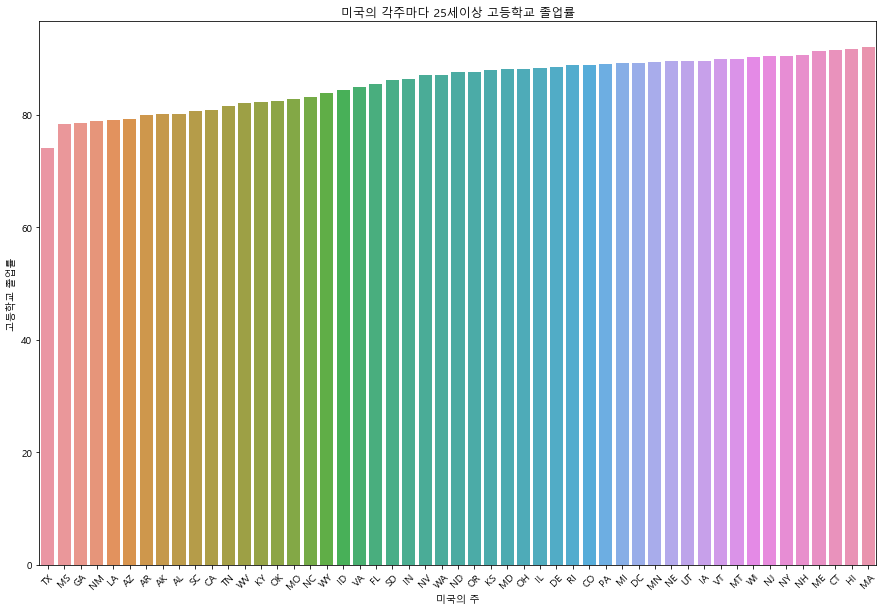

In [97]:
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('미국의 주')
plt.ylabel('고등학교 졸업률')
plt.title("미국의 각주마다 25세이상 고등학교 졸업률")

In [98]:
# 인종 통계
race_city = pd.read_csv('./input/ShareRaceByCity.csv', encoding="windows-1252")

In [99]:
race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [100]:
race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


In [101]:
race_city.corr() #object값은 싱관관계를  비교할수 없음

""


In [103]:
race_city.all #'(X)'값이 있음

<bound method DataFrame.all of       Geographic area                    City share_white share_black  \
0                  AL              Abanda CDP        67.2        30.2   
1                  AL          Abbeville city        54.4        41.4   
2                  AL         Adamsville city        52.3        44.9   
3                  AL            Addison town        99.1         0.1   
4                  AL              Akron town        13.2        86.5   
5                  AL          Alabaster city        79.4        13.5   
6                  AL        Albertville city        75.9         1.9   
7                  AL     Alexander City city        62.2          32   
8                  AL          Alexandria CDP        87.4        10.2   
9                  AL         Aliceville city        22.6        74.9   
10                 AL            Allgood town        79.6         0.6   
11                 AL            Altoona town        95.8         1.7   
12                 A

In [104]:
race_city.replace(['(X)'],0.0,inplace = True)#'(X)'값 float로변경

In [105]:
# object이니 float값으로 변경
race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)

In [107]:
race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


In [108]:
#아직도 변경 안됐음
['-'] # '-' 이 있다고 나옴

['-']

In [109]:
race_city.replace(['-'],0.0,inplace = True)

In [110]:
race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)

In [111]:
race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null float64
share_black              29268 non-null float64
share_native_american    29268 non-null float64
share_asian              29268 non-null float64
share_hispanic           29268 non-null float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [112]:
race_city.corr()

,share_white,share_black,share_native_american,share_asian,share_hispanic
share_white,1.000000,-0.671222,-0.519033,-0.258881,-0.221917
share_black,-0.671222,1.000000,-0.075824,0.003975,-0.038492
share_native_american,-0.519033,-0.075824,1.000000,-0.053103,-0.041369
share_asian,-0.258881,0.003975,-0.053103,1.000000,0.079464
share_hispanic,-0.221917,-0.038492,-0.041369,0.079464,1.000000


In [ ]:
area_list = list(race_city['Geographic area'].unique())

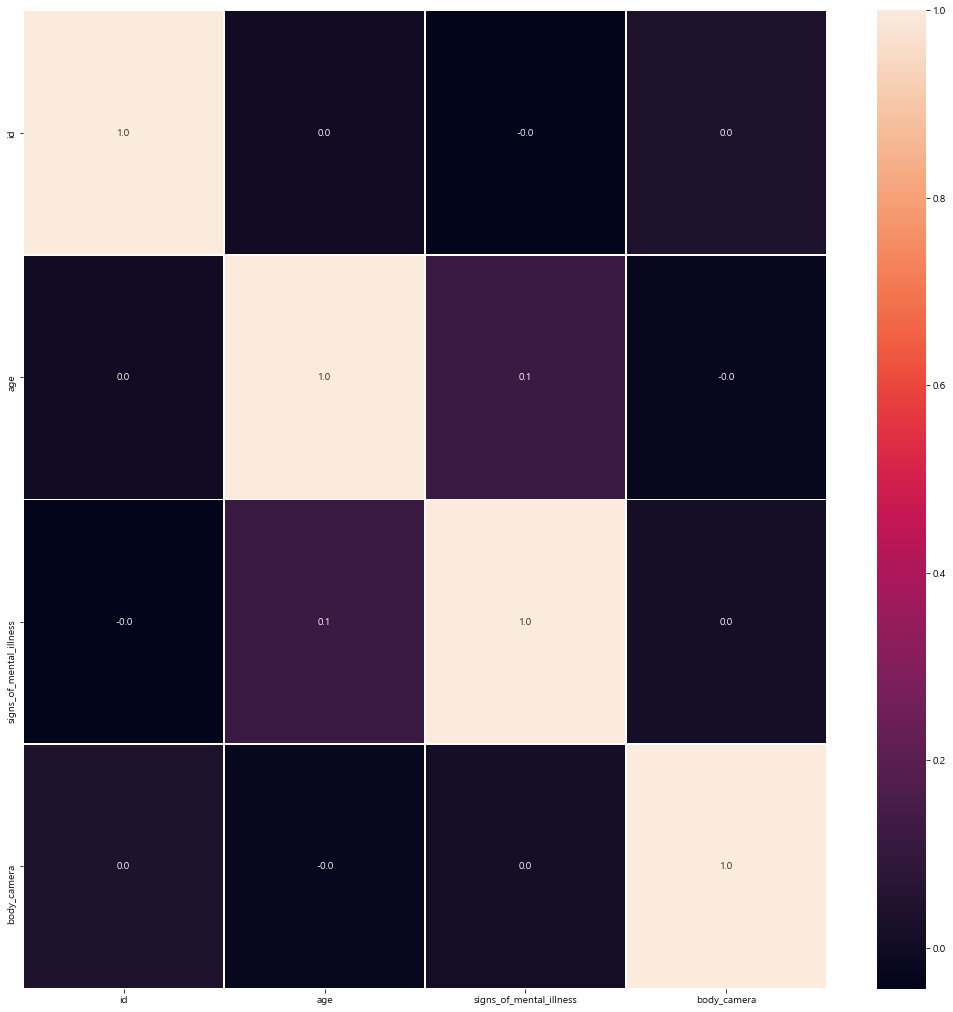

In [113]:
# 상관 관계지도
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(kill.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [117]:
white = []
black = []
native_american = []
asian = []
hispanic = []
for i in area_list:
    x = race_city[race_city['Geographic area']==i]
    white.append(sum(x.share_white)/len(x))
    black.append(sum(x.share_black) / len(x))
    native_american.append(sum(x.share_native_american) / len(x))
    asian.append(sum(x.share_asian) / len(x))
    hispanic.append(sum(x.share_hispanic) / len(x))


[Text(0,0.5,'미국의 주'), Text(0.5,0,'인종비율'), Text(0.5,1,'미국의 주마다 인종비율 ')]

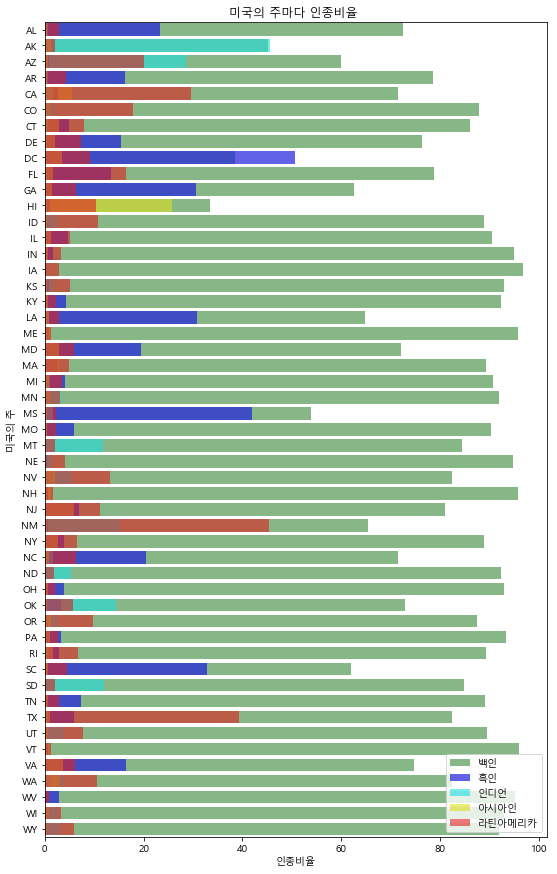

In [120]:
# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=white,y=area_list,color='green',alpha = 0.5,label='백인' )
sns.barplot(x=black,y=area_list,color='blue',alpha = 0.7,label='흑인')
sns.barplot(x=native_american,y=area_list,color='cyan',alpha = 0.6,label='인디언')
sns.barplot(x=asian,y=area_list,color='yellow',alpha = 0.6,label='아시아인')
sns.barplot(x=hispanic,y=area_list,color='red',alpha = 0.6,label='라틴아메리카')
ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='인종비율', ylabel='미국의 주',title = "미국의 주마다 인종비율 ")


Point Plot

In [121]:
# 고등학교 졸업률 대 각주의 빈곤율
sorted_data #24 2 ~~~~는 인덱스

,area_list,area_poverty_ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675
18,LA,22.291772
40,SC,22.105556
48,WV,21.082222
0,AL,20.611795
36,OK,20.545895


In [122]:
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
#각주마다 비율산정
sorted_data['area_poverty_ratio']
#24 2 ~~~~는 인덱스

24    1.000000
2     0.939884
10    0.880204
3     0.854151
31    0.837207
18    0.829176
40    0.822249
48    0.784185
0     0.766687
36    0.764235
17    0.746906
25    0.741352
42    0.739734
33    0.733536
43    0.725191
1     0.694778
12    0.672372
8     0.669537
22    0.665844
9     0.651259
19    0.628392
4     0.628188
37    0.611354
26    0.610889
41    0.585669
14    0.576540
35    0.551500
47    0.551475
16    0.547497
46    0.542542
13    0.515147
45    0.512789
23    0.511293
11    0.498458
5     0.490539
27    0.480483
49    0.478298
29    0.470900
7     0.467033
38    0.464479
28    0.460158
15    0.454971
34    0.451265
44    0.436115
32    0.432929
39    0.385707
20    0.382097
21    0.355090
6     0.339883
50    0.337139
30    0.303558
Name: area_poverty_ratio, dtype: float64

In [123]:
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])
sorted_data2['area_highschool_ratio']

43    0.805044
24    0.852679
10    0.854458
31    0.858124
18    0.859760
2     0.860801
3     0.868748
1     0.870362
0     0.871072
40    0.876313
4     0.878257
42    0.887021
48    0.892569
17    0.893393
36    0.896064
25    0.899663
33    0.903382
50    0.912479
12    0.917299
46    0.922326
9     0.928600
41    0.936481
14    0.937963
28    0.945857
47    0.946145
34    0.951839
37    0.951900
16    0.955877
20    0.957107
35    0.958390
13    0.959371
7     0.961871
39    0.965191
5     0.966290
38    0.966797
22    0.969349
8     0.970352
23    0.972151
27    0.972769
44    0.974097
15    0.974321
45    0.977707
26    0.977878
49    0.980827
30    0.983615
32    0.983804
29    0.985688
19    0.993505
6     0.995254
11    0.996057
21    1.000000
Name: area_highschool_ratio, dtype: float64

In [125]:
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
# concat 명령을 사용한 데이터 연결
#https://datascienceschool.net/view-notebook/7002e92653434bc88c8c026c3449d27b/
data

,area_list,area_poverty_ratio,area_highschool_ratio
0,AL,0.766687,0.871072
1,AK,0.694778,0.870362
2,AZ,0.939884,0.860801
3,AR,0.854151,0.868748
4,CA,0.628188,0.878257
5,CO,0.490539,0.966290
6,CT,0.339883,0.995254
7,DE,0.467033,0.961871
8,DC,0.669537,0.970352
9,FL,0.651259,0.928600


In [126]:
data.sort_values('area_poverty_ratio',inplace=True)

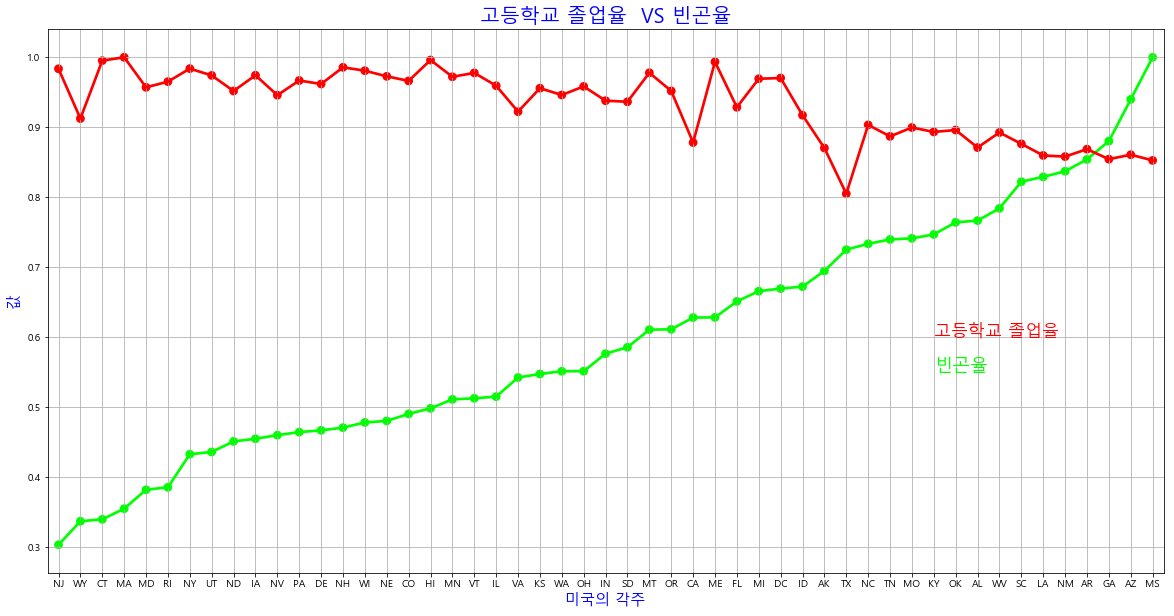

In [128]:
# visualize
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data,color='lime',alpha=0.8)
# y='area_poverty_ratio' 도 쓸수 있음
sns.pointplot(x='area_list',y='area_highschool_ratio',data=data,color='red',alpha=0.8)
plt.text(40,0.6,'고등학교 졸업율',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'빈곤율',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('미국의 각주',fontsize = 15,color='blue')
plt.ylabel('값',fontsize = 15,color='blue')
plt.title('고등학교 졸업율  VS 빈곤율',fontsize = 20,color='blue')
plt.grid()

In [129]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


C:\Users\james\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\james\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


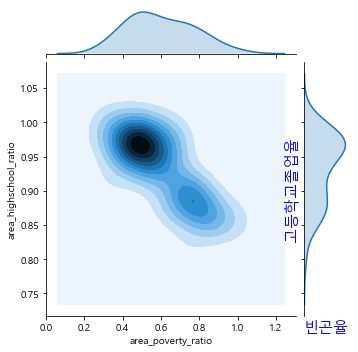

In [133]:
# 고교 졸업률의 시각화 vs 각주의 빈곤율 seabone 다른 스타일
# joint kernel 밀도
# pearsonr = 1이면 양의 상관 관계가 있고 -1이면 음의 상관 관계가 있습니다.
# 값이 0이면 변수 사이에 상관 관계가 없습니다.
# 커널 밀도 추정을 사용하여 공동 분포를 보여라.
g = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="kde", size=5)
plt.xlabel('빈곤율',fontsize = 15,color='blue')
plt.ylabel('고등학교졸업율',fontsize = 15,color='blue')
plt.savefig('graph.png') #파일 저장
plt.show()
#참고 : https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/

In [134]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


C:\Users\james\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\james\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(259.348,0.5,'고등학교졸업율')

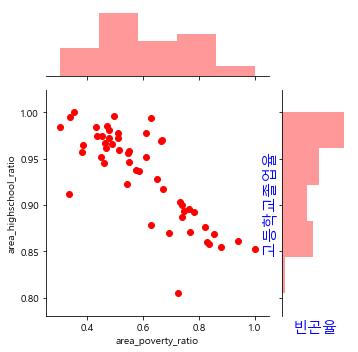

In [136]:
# 당신은 joint plot의 매개 변수를 바꿀 수 있습니다.
# 종류 : { "scatter"| "reg"| "resid"| "kde"| "hex"}
# 매개 변수의 다른 사용법이지만 이전 매개 변수와 동일한 plot
g = sns.jointplot("area_poverty_ratio", "area_highschool_ratio", data=data,size=5, ratio=3, color="r")
plt.xlabel('빈곤율',fontsize = 15,color='blue')
plt.ylabel('고등학교졸업율',fontsize = 15,color='blue')

Pie Chart

In [139]:
kill

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,06/01/15,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,06/01/15,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,06/01/15,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


In [137]:
kill.race.head(15)

0     A
1     W
2     H
3     W
4     H
5     W
6     H
7     W
8     W
9     B
10    W
11    B
12    B
13    W
14    B
Name: race, dtype: object

In [138]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [141]:
kill.race.dropna(inplace = True) # 값이 없는것 삭제
#참고 : https://rfriend.tistory.com/263

In [150]:
kill.race

0       A
1       W
2       H
3       W
4       H
5       W
6       H
7       W
8       W
9       B
10      W
11      B
12      B
13      W
14      B
15      W
16      W
17      B
18      W
19      W
20      H
21      W
22      H
23      H
24      W
25      W
26      B
27      W
28      B
29      W
       ..
2448    B
2457    B
2461    B
2462    W
2464    W
2465    H
2466    W
2469    B
2474    W
2481    W
2484    B
2489    W
2494    W
2500    H
2501    W
2507    W
2508    B
2511    W
2512    W
2513    H
2514    W
2515    W
2516    W
2517    W
2519    B
2523    B
2525    B
2528    H
2533    B
2534    B
Name: race, Length: 2340, dtype: object

In [144]:
labels = kill.race.value_counts().index #인덱스 값만 출력
labels 

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [145]:
colors = ['grey','blue','red','yellow','green','brown'] #표현할 색 지정

In [156]:
explode = [0,0,0,0,0,0] #값을 저장할 리스트지정

In [157]:
sizes = kill.race.value_counts().values # 색깔별 카운드
sizes

array([1201,  618,  423,   39,   31,   28], dtype=int64)

Text(0.5,1,'인종별 살인수')

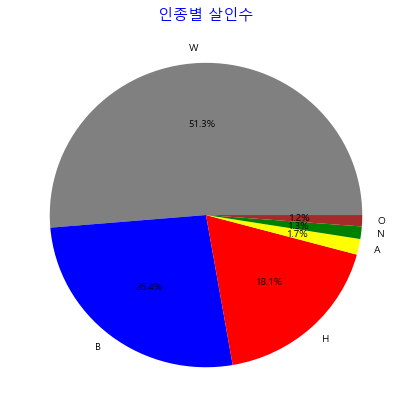

In [158]:
# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%') # '%1.1f%%'는 표현식
plt.title('인종별 살인수',color = 'blue',fontsize = 15)

Lm Plot

In [159]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


C:\Users\james\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


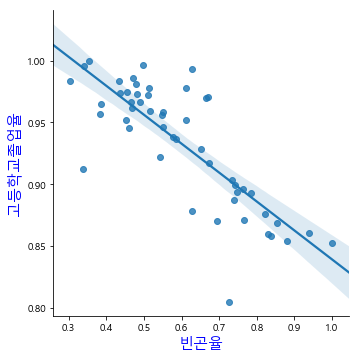

In [161]:
# 각주의 빈곤율 vs 고교 졸업률의 다른스타일시각화
# 각 데이터 세트 내에서 선형 회귀의 결과 표시
sns.lmplot(x="area_poverty_ratio", y="area_highschool_ratio", data=data)
plt.xlabel('빈곤율',fontsize = 15,color='blue')
plt.ylabel('고등학교졸업율',fontsize = 15,color='blue')
plt.show()

Kde Plot

In [162]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


C:\Users\james\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


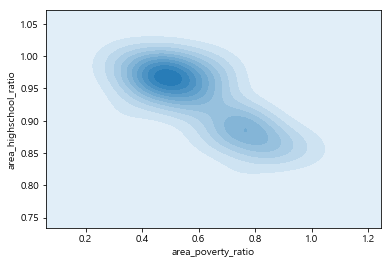

In [163]:
sns.kdeplot(data.area_poverty_ratio, data.area_highschool_ratio, shade=True, cut=3)
plt.show()

Violin Plot

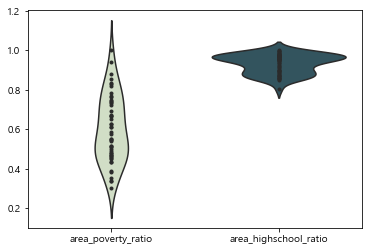

In [171]:
# 바이올린과 포인트로 각각의 분포를 보여라.
# cubehelix를 사용하여 사용자 정의 순차 팔레트 얻기
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()

Heatmap

In [173]:
data.corr()

,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.805761
area_highschool_ratio,-0.805761,1.000000


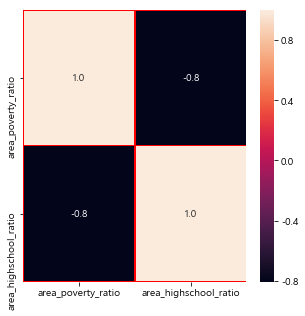

In [174]:
# 상관 관계지도
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

Box Plot

In [176]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [177]:
kill.manner_of_death.unique() #총격, 총격과 테이져건

array(['shot', 'shot and Tasered'], dtype=object)

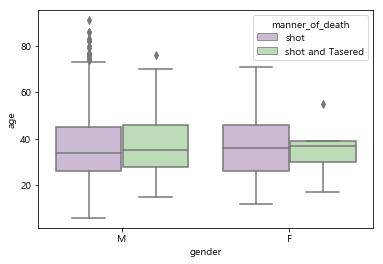

In [181]:
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill, palette="PRGn")
plt.show()

Swarm Plot

In [182]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


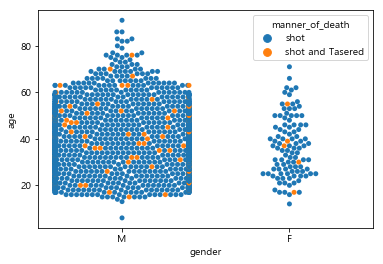

In [183]:
sns.swarmplot(x="gender", y="age",hue="manner_of_death", data=kill)
plt.show()

Pair Plot

In [184]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


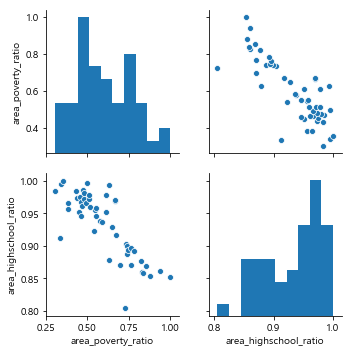

In [185]:
# pair plot
sns.pairplot(data)
plt.show()

Count Plot

In [186]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

In [187]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Text(0.5,1,'gender')

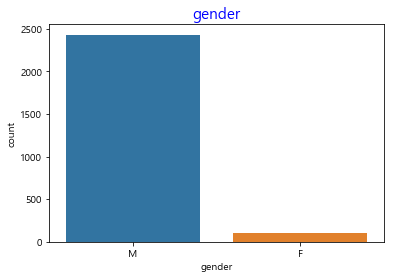

In [189]:
sns.countplot(kill.gender)
plt.title("gender",color = 'blue',fontsize=15)

gun                                 1398
knife                                373
vehicle                              177
unarmed                              171
undetermined                         117
toy weapon                           104
machete                               18
unknown weapon                        18
Taser                                  9
ax                                     9
baseball bat                           8
sword                                  8
box cutter                             7
metal pipe                             7
hammer                                 7
hatchet                                6
crossbow                               6
gun and knife                          5
blunt object                           5
screwdriver                            5
scissors                               3
rock                                   3
guns and explosives                    3
metal stick                            3
metal pole      

Text(0.5,1,'살해 흉기')

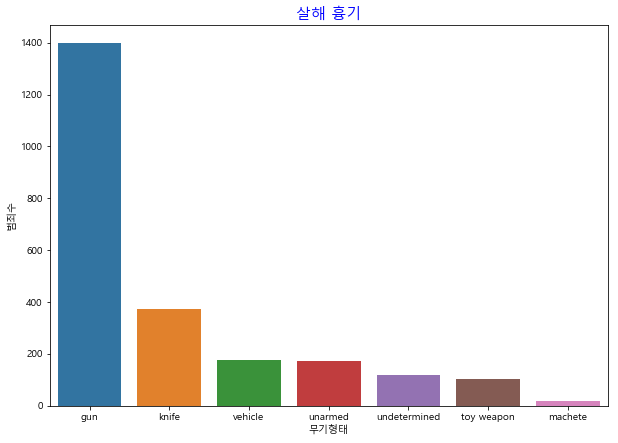

In [193]:
armed = kill.armed.value_counts()
print(armed)
plt.figure(figsize=(10,7))
#그래프에 보여주는 7까지로 제한을 두었음
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('범죄수')
plt.xlabel('무기형태')
plt.title('살해 흉기',color = 'blue',fontsize=15)

In [198]:
above25 =['25이상' if i >= 25 else '25미만' for i in kill.age]
#25보다 크거나 같으면 등의 조건값을 두어 선정
above25

['25이상',
 '25이상',
 '25미만',
 '25이상',
 '25이상',
 '25미만',
 '25미만',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25미만',
 '25이상',
 '25이상',
 '25이상',
 '25미만',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25미만',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25미만',
 '25미만',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25미만',
 '25이상',
 '25이상',
 '25미만',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25미만',
 '25이상',
 '25미만',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25미만',
 '25이상',
 '25이상',
 '25미만',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25이상',
 '25미만',
 '25이상',
 '25미만',
 '25미만',
 '25이상',
 '25이상',
 '25이상',
 '25미만',
 

In [205]:
df = pd.DataFrame({'나이별':above25})
df

,나이별
0,25이상
1,25이상
2,25미만
3,25이상
4,25이상
5,25미만
6,25미만
7,25이상
8,25이상
9,25이상


Text(0.5,1,'죽은사람의 나이별')

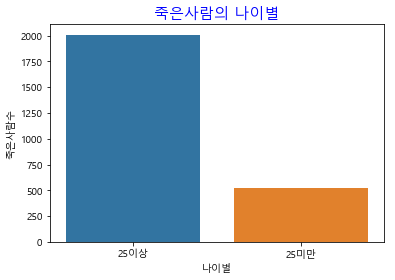

In [208]:
sns.countplot(x=df.나이별)
plt.ylabel('죽은사람수')
plt.title('죽은사람의 나이별',color = 'blue',fontsize=15)

Text(0.5,1,'죽은사람인종별')

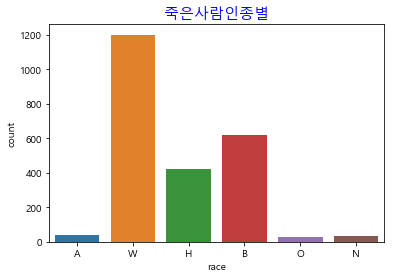

In [212]:
sns.countplot(data=kill, x='race')
plt.title('죽은사람인종별',color = 'blue',fontsize=15)

Text(0.5,1,'가장위험한 도시')

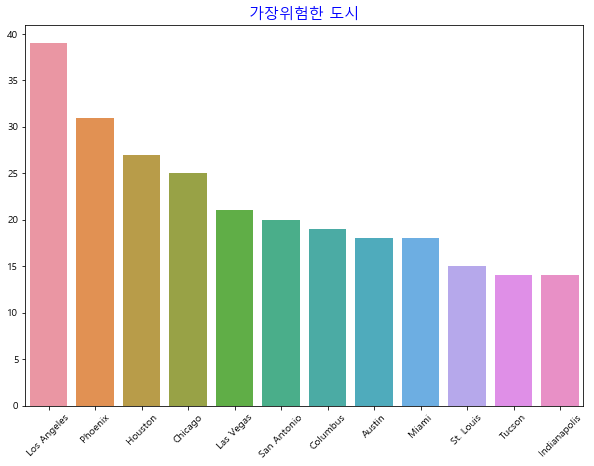

In [214]:
#위험한 도시
city = kill.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation=45)
plt.title('가장위험한 도시',color = 'blue',fontsize=15)

Text(0.5,1,'가장위험한 주')

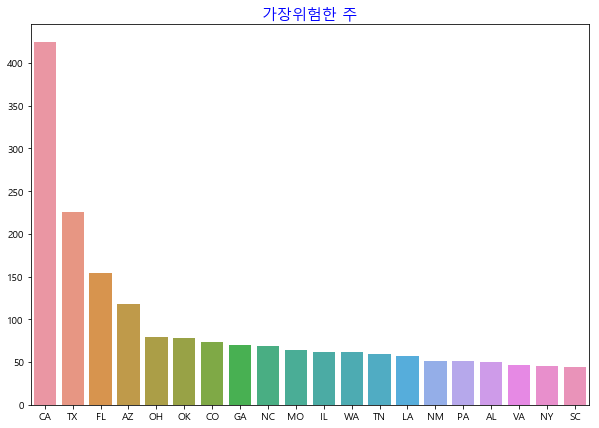

In [218]:
#위험한 주
state = kill.state.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=state[:20].index,y=state[:20].values)
plt.title('가장위험한 주',color = 'blue',fontsize=15)

In [223]:
kill.head() #signs_of_mental_illness정신질환유무

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Text(0.5,1,'정신실환유무')

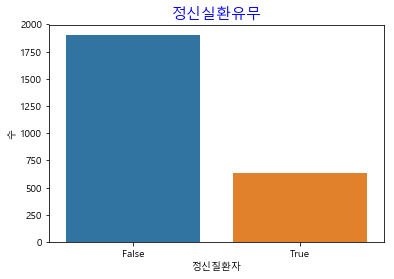

In [224]:
sns.countplot(kill.signs_of_mental_illness)
plt.xlabel('정신질환자')
plt.ylabel('수')
plt.title('정신실환유무',color = 'blue', fontsize = 15)

Text(0.5,1,'위협유형별 살인')

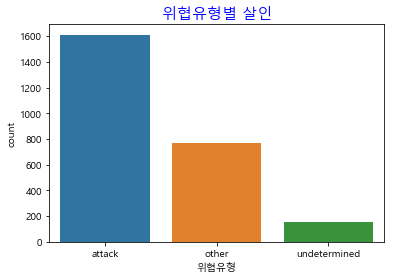

In [226]:
#위협 유형
sns.countplot(kill.threat_level)
plt.xlabel('위협유형')
plt.title('위협유형별 살인',color = 'blue', fontsize = 15)

Text(0.5,1,'도주하다 살인')

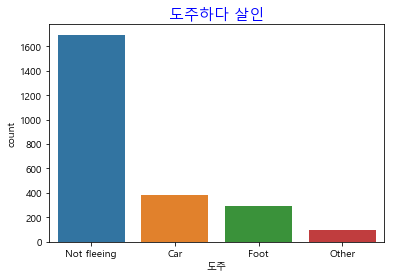

In [227]:
sns.countplot(kill.flee)
plt.xlabel('도주')
plt.title('도주하다 살인',color = 'blue', fontsize = 15)

Text(0.5,1,'경찰카메라 유무별 살인 ')

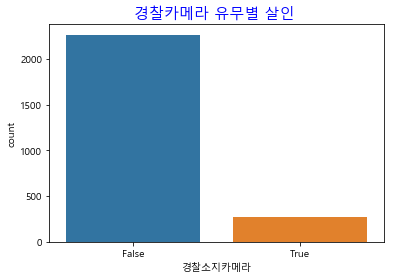

In [229]:
sns.countplot(kill.body_camera)
plt.xlabel('경찰소지카메라')
plt.title('경찰카메라 유무별 살인 ',color = 'blue',fontsize = 15)

Text(0.5,1,'미국 주별 살인수')

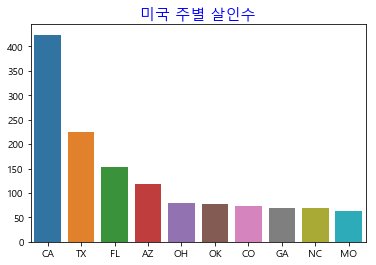

In [232]:
sta = kill.state.value_counts().index[:10]
sns.barplot(x=sta,y = kill.state.value_counts().values[:10])
plt.title('미국 주별 살인수',color = 'blue',fontsize=15)